# Sınıflandırma Problemleri

In [88]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon 

## Model 

In [89]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [91]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

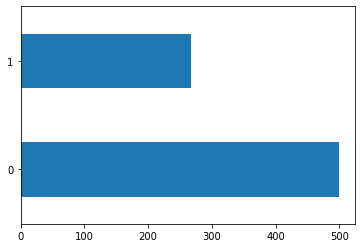

In [92]:
df["Outcome"].value_counts().plot.barh();

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [94]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [95]:
#statsmodels

In [96]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 23 Jun 2023   Pseudo R-squ.:                 0.05922
Time:                        11:15:40   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [97]:
#scikit-learn

In [98]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [99]:
loj_model.intercept_

array([-5.84073324])

In [100]:
loj_model.coef_

array([[ 1.16937119e-01,  2.82506791e-02, -1.69647463e-02,
         7.64900753e-04, -6.30568264e-04,  5.91967766e-02,
         6.68475894e-01,  7.08845329e-03]])

## Tahmin & Model Tuning

In [101]:
y_pred = loj_model.predict(X)

In [102]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [103]:
accuracy_score(y, y_pred)

0.7747395833333334

In [104]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [105]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [106]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.35208919, 0.64791081],
       [0.91613598, 0.08386402],
       [0.22544273, 0.77455727],
       [0.92033572, 0.07966428],
       [0.16985872, 0.83014128],
       [0.79768782, 0.20231218],
       [0.8787278 , 0.1212722 ],
       [0.2764273 , 0.7235727 ],
       [0.32085978, 0.67914022],
       [0.9216265 , 0.0783735 ]])

In [107]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [108]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [109]:
y_probs[0:10]

array([0.64791081, 0.08386402, 0.77455727, 0.07966428, 0.83014128,
       0.20231218, 0.1212722 , 0.7235727 , 0.67914022, 0.0783735 ])

In [110]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [111]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [112]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [113]:
accuracy_score(y, y_pred)

0.7747395833333334

In [114]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [115]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64791081, 0.08386402, 0.77455727, 0.07966428, 0.83014128])

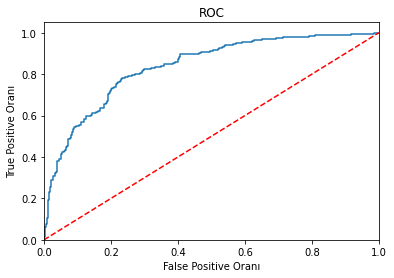

In [116]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [118]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [119]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [120]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7748188405797102

# Gaussian Naive Bayes

In [121]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [122]:
from sklearn.naive_bayes import GaussianNB

In [123]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [124]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [125]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [126]:
np.array(y[0:10])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [127]:
y_pred = nb_model.predict(X_test)

In [128]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [129]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN

## Model & Tahmin

In [130]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [131]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [132]:
y_pred = knn_model.predict(X_test)

In [133]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [135]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [136]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [137]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [138]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [139]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [140]:
y_pred = knn_tuned.predict(X_test)

In [141]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



# SVC

## Model & Tahmin

In [143]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [144]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [145]:
svm_model

SVC(kernel='linear')

In [146]:
y_pred = svm_model.predict(X_test)

In [147]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [148]:
svc_params = {"C": np.arange(5,10)} # np.arange(1,10)

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 3, #cv = 10 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([5, 6, 7, 8, 9])}, verbose=2)

In [149]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 8}


In [150]:
svc_tuned = SVC(kernel = "linear", C = 8).fit(X_train, y_train)

In [151]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

# RBF SVC

## Model & Tahmin

In [152]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [153]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [154]:
svc_model

SVC()

In [155]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [156]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [157]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 3, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [158]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [159]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [160]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# Yapay Sinir Ağları

## Model & Tahmin

In [162]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [163]:
from sklearn.preprocessing import StandardScaler  

In [164]:
scaler = StandardScaler()

In [165]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [167]:
X_test[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [168]:
from sklearn.neural_network import MLPClassifier

In [169]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [170]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

## Model Tuning

In [171]:
mlpc

MLPClassifier()

In [172]:
#?mlpc

In [173]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["adam"], # "solver" : ["lbfgs","adam","sgd"]
              "activation": ["logistic"]} #"activation": ["relu","logistic"]


In [174]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 3, # cv=10
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['adam']},
             verbose=2)

In [175]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}


In [176]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.01, 
                           hidden_layer_sizes = (100, 100),
                          solver = "adam")

In [177]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(100, 100))

In [178]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



# CART

## Model & Tahmin

In [180]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [181]:
from sklearn.tree import DecisionTreeClassifier

In [182]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [183]:
cart_model

DecisionTreeClassifier()

In [184]:
#!pip install skompiler
#from skompiler import skompile
#print(skompile(cart_model.predict).to("python/code"))

In [185]:
x = [9]

In [186]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [187]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.70995670995671

## Model Tuning

In [188]:
cart_model

DecisionTreeClassifier()

In [189]:
#?cart_model

In [190]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [191]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)


In [192]:
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [193]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [194]:
#final

In [195]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [196]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [197]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [200]:
rf_model

RandomForestClassifier()

In [201]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [202]:
rf_model

RandomForestClassifier()

In [203]:
#?rf_model

In [204]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [205]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 3, #cv = 10
                           n_jobs = -1, 
                           verbose = 2) 

In [206]:
rf_cv_model.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [207]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [208]:
#final

In [209]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 2, 
                                  min_samples_split = 10,
                                  n_estimators = 10)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=10,
                       n_estimators=10)

In [210]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [211]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

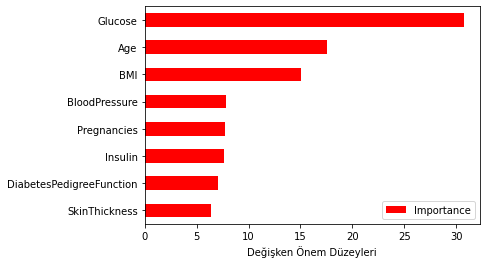

In [212]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [213]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [214]:
from sklearn.ensemble import GradientBoostingClassifier

In [215]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [216]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [217]:
gbm_model

GradientBoostingClassifier()

In [218]:
#?gbm_model

In [219]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [220]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 3, n_jobs = -1, verbose = 2) #cv = 10

In [221]:
gbm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [222]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [223]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 100)

In [224]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [225]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [226]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       151
           1       0.62      0.68      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



# XGBoost

In [227]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [228]:
#!pip install xgboost
from xgboost import XGBClassifier

In [229]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[11:24:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [230]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [231]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [232]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [233]:
#?xgb_model

In [234]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [235]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 2, n_jobs = -1, verbose = 2) #cv = 10

In [236]:
xgb_cv_model.fit(X_train, y_train)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits
[11:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [237]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [238]:
xgb = XGBClassifier(learning_rate = 0.05, 
                    max_depth = 5,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.6)

In [239]:
xgb_tuned =  xgb.fit(X_train,y_train)

[11:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [240]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [241]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       151
           1       0.63      0.70      0.66        80

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.76       231



# LightGBM

In [242]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [243]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [244]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [245]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [246]:
## Model Tuning

In [247]:
lgbm_model

LGBMClassifier()

In [248]:
#?lgbm_model

In [249]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [250]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 2, #cv=10 
                             n_jobs = -1, 
                             verbose = 2)



In [251]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


GridSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [252]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [253]:
lgbm = LGBMClassifier(learning_rate = 0.05, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 5)

In [254]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [255]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

# CatBoost

## Model & Tahmin

In [256]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [257]:
#!pip install catboost
from catboost import CatBoostClassifier

In [258]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 4.97ms	remaining: 4.96s
1:	learn: 0.6843414	total: 9.52ms	remaining: 4.75s
2:	learn: 0.6805760	total: 13.9ms	remaining: 4.63s
3:	learn: 0.6765782	total: 18.4ms	remaining: 4.57s
4:	learn: 0.6720829	total: 22.7ms	remaining: 4.52s
5:	learn: 0.6681617	total: 27.7ms	remaining: 4.6s
6:	learn: 0.6641912	total: 31.9ms	remaining: 4.53s
7:	learn: 0.6602881	total: 36ms	remaining: 4.46s
8:	learn: 0.6562626	total: 40.9ms	remaining: 4.5s
9:	learn: 0.6528483	total: 45.5ms	remaining: 4.5s
10:	learn: 0.6487823	total: 50.1ms	remaining: 4.5s
11:	learn: 0.6454980	total: 55.4ms	remaining: 4.56s
12:	learn: 0.6418953	total: 59.9ms	remaining: 4.55s
13:	learn: 0.6374431	total: 71.2ms	remaining: 5.02s
14:	learn: 0.6339676	total: 98.9ms	remaining: 6.49s
15:	learn: 0.6304252	total: 106ms	remaining: 6.51s
16:	learn: 0.6266998	total: 111ms	remaining: 6.39s
17:	learn: 0.6237660	total: 115ms	remaining: 6.26s
18:	learn: 0.6204394	total: 120ms	remaining: 6.17s
19:	

In [259]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [260]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [261]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=2, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 2 folds for each of 18 candidates, totalling 36 fits
0:	learn: 0.6299210	total: 19.7ms	remaining: 9.82s
1:	learn: 0.6012987	total: 22.6ms	remaining: 5.62s
2:	learn: 0.5586401	total: 30.6ms	remaining: 5.08s
3:	learn: 0.5293438	total: 38.8ms	remaining: 4.82s
4:	learn: 0.5010737	total: 46.4ms	remaining: 4.59s
5:	learn: 0.4761785	total: 55.7ms	remaining: 4.59s
6:	learn: 0.4549779	total: 62.3ms	remaining: 4.39s
7:	learn: 0.4335932	total: 72.2ms	remaining: 4.44s
8:	learn: 0.4177409	total: 79.6ms	remaining: 4.34s
9:	learn: 0.4051898	total: 87.4ms	remaining: 4.28s
10:	learn: 0.3939146	total: 93.1ms	remaining: 4.14s
11:	learn: 0.3794142	total: 102ms	remaining: 4.13s
12:	learn: 0.3670691	total: 108ms	remaining: 4.04s
13:	learn: 0.3584774	total: 112ms	remaining: 3.89s
14:	learn: 0.3506715	total: 119ms	remaining: 3.86s
15:	learn: 0.3377564	total: 126ms	remaining: 3.83s
16:	learn: 0.3273857	total: 134ms	remaining: 3.8s
17:	learn: 0.3202416	total: 140ms	remaining: 3.75s
18:	learn: 0.3115747	

{'depth': 8, 'iterations': 500, 'learning_rate': 0.1}

In [262]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 500, 'learning_rate': 0.1}

In [263]:
catb = CatBoostClassifier(iterations = 500, 
                          learning_rate = 0.1, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6299210	total: 14.1ms	remaining: 7.03s
1:	learn: 0.6012987	total: 18.5ms	remaining: 4.59s
2:	learn: 0.5586401	total: 41.6ms	remaining: 6.89s
3:	learn: 0.5293438	total: 54.5ms	remaining: 6.75s
4:	learn: 0.5010737	total: 81.8ms	remaining: 8.1s
5:	learn: 0.4761785	total: 94.3ms	remaining: 7.76s
6:	learn: 0.4549779	total: 107ms	remaining: 7.52s
7:	learn: 0.4335932	total: 142ms	remaining: 8.75s
8:	learn: 0.4177409	total: 156ms	remaining: 8.49s
9:	learn: 0.4051898	total: 173ms	remaining: 8.48s
10:	learn: 0.3939146	total: 182ms	remaining: 8.07s
11:	learn: 0.3794142	total: 194ms	remaining: 7.89s
12:	learn: 0.3670691	total: 206ms	remaining: 7.72s
13:	learn: 0.3584774	total: 213ms	remaining: 7.38s
14:	learn: 0.3506715	total: 223ms	remaining: 7.21s
15:	learn: 0.3377564	total: 231ms	remaining: 6.98s
16:	learn: 0.3273857	total: 239ms	remaining: 6.8s
17:	learn: 0.3202416	total: 250ms	remaining: 6.69s
18:	learn: 0.3115747	total: 263ms	remaining: 6.66s
19:	learn: 0.3066545	total: 278ms	rem

In [264]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7186147186147186

# Tüm Modellerin Karşılaştırılması

In [265]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 34.6320%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 73.5931%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.4589%
----------------------------
CatBoostClassifier:
Accuracy: 71.8615%
----------------------------
LGBMClassifier:
Accuracy: 75.7576%
----------------------------
XGBClassifier:
Accuracy: 75.3247%


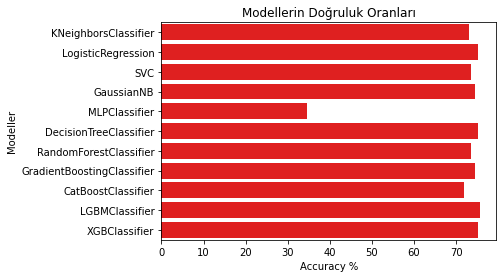

In [266]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    